# Combined Cycle Power Plant- Linear Regression

In [219]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [220]:
#Load the data 
data=pd.read_csv('CombinedCyclePowerPlant.csv')

### Data Description

The dataset contains 9568 data points collected from a Combined Cycle Power Plant over 6 years (2006-2011), when the power plant was set to work with full load. Features consist of hourly average ambient variables-
1. Temperature (T)
2. Ambient Pressure (AP) 
3. Relative Humidity (RH)  
4. Exhaust Vacuum (V) 

### Predict : Energy output of plant(EP)

A combined cycle power plant (CCPP) is composed of gas turbines (GT), steam turbines (ST) and heat recovery steam generators. In a CCPP, the electricity is generated by gas and steam turbines, which are combined in one cycle, and is transferred from one turbine to another. While the Vacuum is colected from and has effect on the Steam Turbine, he other three of the ambient variables effect the GT performance.
For comparability with our baseline studies, and to allow 5x2 fold statistical tests be carried out, we provide the data shuffled five times. For each shuffling 2-fold CV is carried out and the resulting 10 measurements are used for statistical testing.

Attribute Information:

Features consist of hourly average ambient variables 
- Temperature (T) in the range 1.81°C and 37.11°C,
- Ambient Pressure (AP) in the range 992.89-1033.30 milibar,
- Relative Humidity (RH) in the range 25.56% to 100.16%
- Exhaust Vacuum (V) in the range 25.36-81.56 cm Hg
- Net hourly electrical energy output (EP) 420.26-495.76 MW
The averages are taken from various sensors located around the plant that record the ambient variables every second. The variables are given without normalization.


In [221]:
#Data Preprocesing 
#Counting the mising values from each feature using isnull()
data.isnull().sum()

# T    0
 V     0
 AP    0
 RH    0
 EP    0
dtype: int64

###### There is no missing data

# Exploratory Data Analysis
Exploratory Data Analysis is a very important step before training the model.We will use some visualizations to understand the relationship of the target variable with other features.

In [222]:
data=pd.DataFrame(data)
data.columns = data.columns.str.strip()

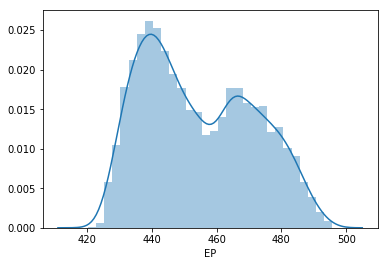

In [223]:
sns.distplot(data.EP,bins=30)

### Inference 
EP is bimolar. It has 2 peaks
1. AT 440 (MAX)
2. ARROUND 470 

### Correlation 
Next, we create a correlation matrix that measures the linear relationships between the variables. The correlation matrix can be formed by using the corr function from the pandas dataframe library. We will use the heatmap function from the seaborn library to plot the correlation matrix.

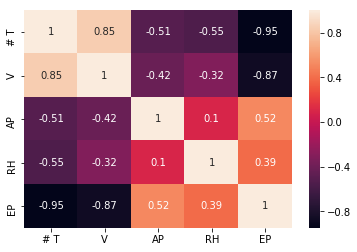

In [224]:
#Finding Correlation
corr=data.corr()
sns.heatmap(corr,annot=True) # annot = True to print the values inside the square

The correlation coefficient ranges from -1 to 1. If the value is close to 1, 
it means that there is a strong positive correlation between the two variables. 
When it is close to -1, the variables have a strong negative correlation.

## Observations
1. To fit a linear regression model, we select those features which have a high correlation with our target variable EP. 
   By looking at the correlation matrix we can see that V and T has a strong negative correlation with EP (-0.95,-0.87).
2. AP and Rh has moderate positive correlation with EP.   
3. An important point in selecting features for a linear regression model is to check for multi-co-linearity. We should not        select the pairs which are strongly collinear with each other together for training the model.But as there are only 4          regressors we will use all of them here. 

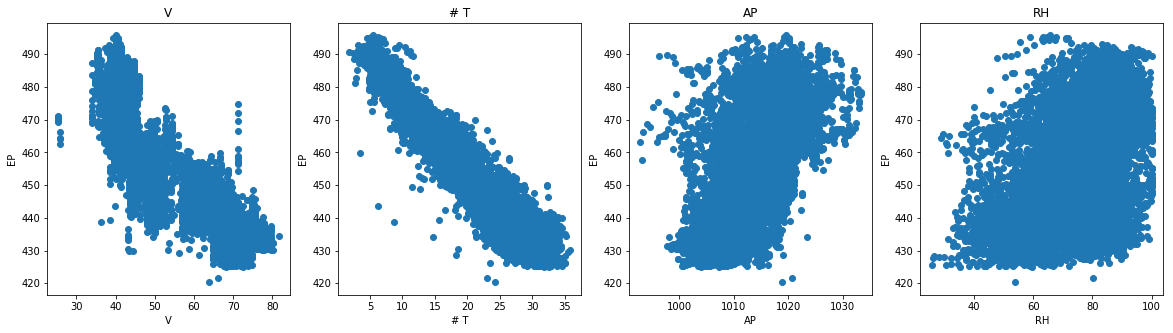

In [225]:
plt.figure(figsize=(20, 5))

features=['V','# T','AP','RH']

target= data.EP

for i, col in enumerate(features) :
    plt.subplot(1,len(features),i+1)
    x=data[col]
    y=target
    plt.scatter(x,y)
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('EP')
    

## Observations
1. The EP(electrical energy) decreases as the value of V(exhaust vacuum) increases linearly. There are few outliers.Though it      doesn’t look to be following exactly a linear line.
2. The EP tend to decrease with an increase in # T.
3. The EP tend to increase with the increase in AP.
4. The ep tend to increase with the increase in RH.

In [226]:
#Prepareing data for the training Model

x=data.iloc[:,:-1]
y=data['EP']

print(x.shape)
print(y.shape)

(7176, 4)
(7176,)


### Splitting the training and testing data

Next, we split the data into training and testing sets. We train the model with 85% of the samples and test with the remaining 15%. We do this to assess the model’s performance on unseen data. To split the data we use train_test_split function provided by scikit-learn library. We finally print the sizes of our training and test set to verify if the splitting has occurred properly.

In [227]:
from sklearn.model_selection import train_test_split as tts

xTrain,xTest,yTrain,yTest=tts(x,y,test_size=0.3,random_state=4)

print(xTrain.shape)
print(xTest.shape)
print(yTrain.shape)
print(yTest.shape)

(5023, 4)
(2153, 4)
(5023,)
(2153,)


## Scaling of Data

We apply fit_transform() to training data and only transform to test data.
fit_transform() internally implements fit() first and then transform.

In [236]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

xTrain=scaler.fit_transform(xTrain)
xTest=scaler.transform(xTest)

## Training and testing the model
We use scikit-learn’s LinearRegression to train our model on both the training and test sets.


In [229]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

model=LinearRegression()

model.fit(xTrain,yTrain)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

###  Model Evaluation

We will evaluate our model using RMSE and R2-score.

In [230]:
yTestPredict=model.predict(xTest)
rmseTest=(np.sqrt(mean_squared_error(yTest,yTestPredict)))
r2Test=r2_score(yTest,yTestPredict)
print('For Testing Set')
print('RMSE = ') 
print(rmseTest)
print('R2 Score = ')
print(r2Test)

print('-'*30)

yTrainPredict=model.predict(xTrain)
rmseTrain=(np.sqrt(mean_squared_error(yTrain,yTrainPredict)))
print('For Training Set')
print('RMSE = ')
print(rmseTrain)
print('R2 Score = ')
print(r2Test)

For Testing Set
RMSE = 
4.580169872259043
R2 Score = 
0.9260979602180083
------------------------------
For Training Set
RMSE = 
4.57091683147236
R2 Score = 
0.9260979602180083


### RMSE
The root-mean-square error (RMSE)  is a frequently used measure of the differences between values (sample or population values) predicted by a model or an estimator and the values observed.

### R2 SCORE

R-squared is a statistical measure of how close the data are to the fitted regression line. It is also known as the coefficient of determination, or the coefficient of multiple determination for multiple regression.

The definition of R-squared is fairly straight-forward; it is the percentage of the response variable variation that is explained by a linear model. Or:

R-squared = Explained variation / Total variation

R-squared is always between 0 and 100%:

0% indicates that the model explains none of the variability of the response data around its mean.
100% indicates that the model explains all the variability of the response data around its mean.
In general, the higher the R-squared, the better the model fits your data.

## Feature Engineering
Feature engineering, also known as feature creation, is the process of constructing new features from existing data to train a machine learning model. This step can be more important than the actual model used because a machine learning algorithm only learns from the data we give it, and creating features that are relevant to a task is absolutely crucial

## Feature Interaction
It is a part of feature engineering, where we add columns by performing simple mathematical operations and we are not concerned about the meaning of column obtanined.

In [231]:
data.head()

,# T,V,AP,RH,EP
0,8.58,38.38,1021.03,84.37,482.26
1,21.79,58.20,1017.21,66.74,446.94
2,16.64,48.92,1011.55,78.76,452.56
3,31.38,71.32,1009.17,60.42,433.44
4,9.20,40.03,1017.05,92.46,480.38


In [232]:
data1=pd.DataFrame(data.EP)
data1['SRRH']=np.sqrt(data['RH'])
corr1=data1.corr()
print(corr1)


           EP     SRRH
EP    1.00000  0.39097
SRRH  0.39097  1.00000


In [233]:
data2=pd.DataFrame(data.EP)
data2['SRH']=np.power(data['RH'],2)
corr2=data2.corr()
print(corr2)

           EP       SRH
EP   1.000000  0.391356
SRH  0.391356  1.000000


In [235]:
data2=pd.DataFrame(data.EP)
data2['SRH']=np.power(data['RH'],3)
corr2=data2.corr()
print(corr2)

          EP      SRH
EP   1.00000  0.38428
SRH  0.38428  1.00000
